# Dataset Information
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

# Attribute Information:
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index dteday : date season : season (1:winter, 2:spring, 3:summer, 4:fall) yr : year (0: 2011, 1:2012) mnth : month ( 1 to 12) hr : hour (0 to 23) holiday : weather day is holiday or not (extracted from [Web Link]) weekday : day of the week workingday : if day is neither weekend nor holiday is 1, otherwise is 0. weathersit : 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) hum: Normalized humidity. The values are divided to 100 (max) windspeed: Normalized wind speed. The values are divided to 67 (max) casual: count of casual users registered: count of registered users cnt: count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data Preprocessing

In [2]:
df1 = pd.read_csv('./hour.csv')
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df2 = pd.read_csv('./day.csv')
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# concatenate the two dataframes vertically
result = pd.concat([df1, df2], axis=0)


In [5]:
# data type info
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18110 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   hr          17379 non-null  float64
 6   holiday     18110 non-null  int64  
 7   weekday     18110 non-null  int64  
 8   workingday  18110 non-null  int64  
 9   weathersit  18110 non-null  int64  
 10  temp        18110 non-null  float64
 11  atemp       18110 non-null  float64
 12  hum         18110 non-null  float64
 13  windspeed   18110 non-null  float64
 14  casual      18110 non-null  int64  
 15  registered  18110 non-null  int64  
 16  cnt         18110 non-null  int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 2.5+ MB


In [6]:
# statistical info
result.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,18110.000000,18110.000000,18110.000000,18110.000000,17379.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000
mean,8354.006405,2.501436,0.502485,6.537051,11.546752,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033
std,5180.771860,1.107045,0.500008,3.439213,6.914405,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3797.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000
50%,8324.500000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000
75%,12851.750000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000


In [7]:
# check for null values
result.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

as we can see .. hour attribute has 731 null value

In [8]:
# to check the percentage of the null value

(result.isna().sum())/(result.shape[0])

instant       0.000000
dteday        0.000000
season        0.000000
yr            0.000000
mnth          0.000000
hr            0.040364
holiday       0.000000
weekday       0.000000
workingday    0.000000
weathersit    0.000000
temp          0.000000
atemp         0.000000
hum           0.000000
windspeed     0.000000
casual        0.000000
registered    0.000000
cnt           0.000000
dtype: float64

it is very low as we can see here, so we can drop them with no problems.

In [9]:
copy_result = result.dropna()

# now we can work on the copy_result data frame

In [10]:
# renaming some attributes:

copy_result = copy_result.rename(columns = {'yr':'year',
                          'mnth':'month',
                          'hr':'hour',
                          'hum':'humidity',
                          'weathersit':'weather',
                          'cnt':'count'})
copy_result.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0.0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1.0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2.0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3.0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4.0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# dropping some attributes that we don't need 


# copy_result = copy_result.drop(columns=['instant','dteday','year'])
copy_result = copy_result.drop(columns=['instant'])

In [12]:
# change int columns to category types

cols = ['season','month','hour','holiday','workingday','weather']


for col in cols:
    copy_result[col] = copy_result[col].astype('category')
    
# to check the changes
copy_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dteday      17379 non-null  object  
 1   season      17379 non-null  category
 2   year        17379 non-null  int64   
 3   month       17379 non-null  category
 4   hour        17379 non-null  category
 5   holiday     17379 non-null  category
 6   weekday     17379 non-null  int64   
 7   workingday  17379 non-null  category
 8   weather     17379 non-null  category
 9   temp        17379 non-null  float64 
 10  atemp       17379 non-null  float64 
 11  humidity    17379 non-null  float64 
 12  windspeed   17379 non-null  float64 
 13  casual      17379 non-null  int64   
 14  registered  17379 non-null  int64   
 15  count       17379 non-null  int64   
dtypes: category(6), float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [13]:
#  now lets change the dteday to datetime

copy_result['dteday']=pd.to_datetime(copy_result['dteday'])

In [14]:
#  to split year/month/day/dayofweek/hour

def split_datetime(df):
    df['year']=df['dteday'].apply(lambda t:t.year)
    df['month']=df['dteday'].apply(lambda t:t.month)    
    df['day']=df['dteday'].apply(lambda t:t.day)    
    df['dayofweek']=df['dteday'].apply(lambda t:t.dayofweek)
    df['hours']=df['dteday'].apply(lambda t:t.hour)
    df=df.drop(['dteday'],axis=1)
    return df


# now we use our function...

copy_result=split_datetime(copy_result)
copy_result.sample(2)

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,dayofweek,hours
5384,3,2011,8,6.0,0,3,1,1,0.62,0.5909,0.78,0.0000,4,101,105,17,2,0
10327,1,2012,3,10.0,0,0,0,1,0.32,0.3030,0.49,0.2836,71,147,218,11,6,0


In [15]:
# # because count column is equal to sum of casual and registered cols, so we will drop them 
# copy_result=copy_result.drop(['casual','registered'],axis=1)

# Exploratory Data Analysis

In [43]:
# Histograms for numerical data
def hist(numCol):
    fig = plt.figure()
    sns.histplot(copy_result[numCol])
    plt.show()

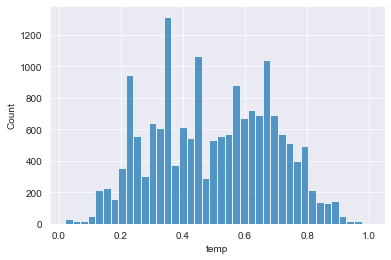

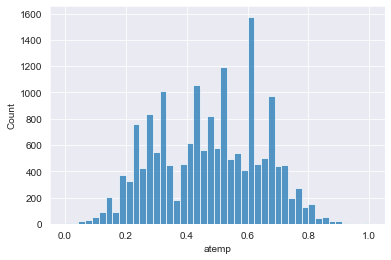

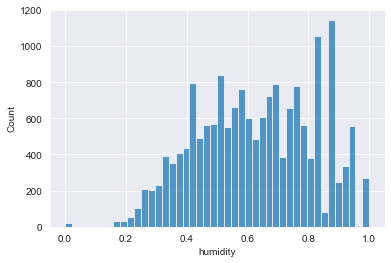

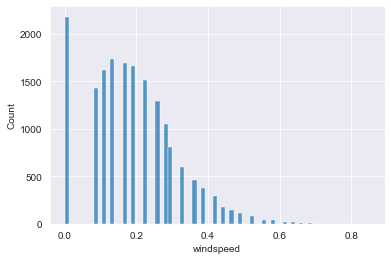

In [44]:
numCols = ['temp','atemp','humidity','windspeed']
for col in numCols:
    hist(col)

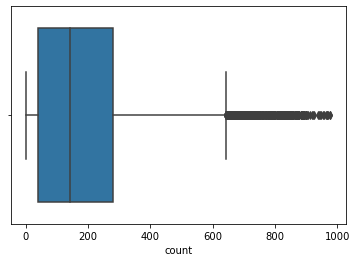

In [16]:
# Boxplot of count

sns.boxplot(data=copy_result,x='count')
plt.show()

From the boxplot of count column, it is clearly visible that most of the data lies between 30 to 300 and a huge numbers of outliers are present in the plot.

C:\Users\maria\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

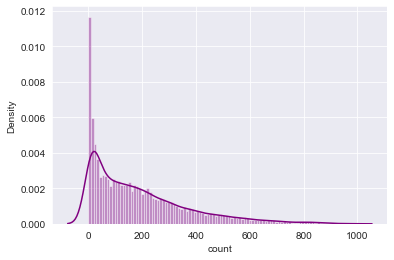

In [17]:
# Histogram of count
sns.set_style('darkgrid')
sns.distplot(copy_result['count'],bins=100,color='purple')

from the graph it is shown that the count data is skewed at the left side. the density of values is more between 0 and 200.

['weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
['humidity', 'windspeed', 'casual', 'registered']


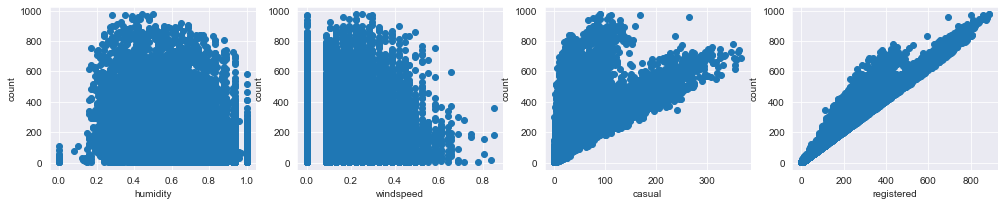

In [20]:
# Scatter plot between count & each numeric features
fields =[f for f in copy_result]
fields = fields[5:-3]
print(fields)


print(fields[5:9])
fig = plt.figure(figsize=(17,3))

for i,f in enumerate(fields[5:9]):
    ax=fig.add_subplot(1,4,i+1)
    ax.scatter(copy_result[f],copy_result['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
plt.show()

In [ ]:
# # Boxplot between count & each categorical features

# fig,axes = plt.subplots(nrows=2,ncols=2)
# fig.set_size_inches(20,10)

# sns.boxplot(data=copy_result,x='season',y='count',ax=axes[0][0])
# sns.boxplot(data=copy_result,x='holiday',y='count',ax=axes[0][1])
# sns.boxplot(data=copy_result,x='workingday',y='count',ax=axes[1][0])
# sns.boxplot(data=copy_result,x='weather',y='count',ax=axes[1][1])

# axes[0][0].set(xlabel='season',ylabel='count')
# axes[0][1].set(xlabel='holiday',ylabel='count')
# axes[1][0].set(xlabel='workingday',ylabel='count')
# axes[1][1].set(xlabel='weather',ylabel='count')

In [21]:
def boxPlot_count(catCol):
    fig = plt.figure()
    sns.boxplot(data=copy_result,x=catCol,y='count')
    plt.show()

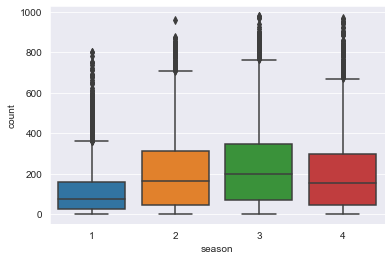

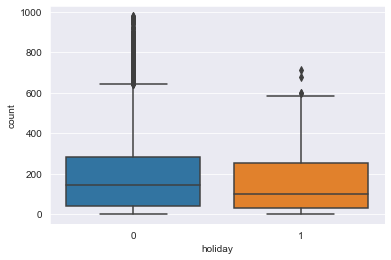

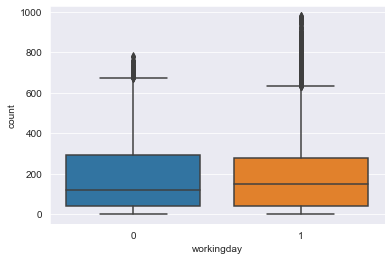

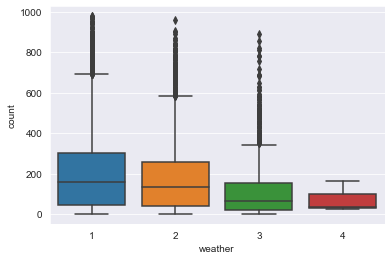

In [22]:
# Boxplot between count & each categorical features:

catcols=['season','holiday','workingday','weather']
for col in catcols:
    boxPlot_count(col)

<AxesSubplot:>

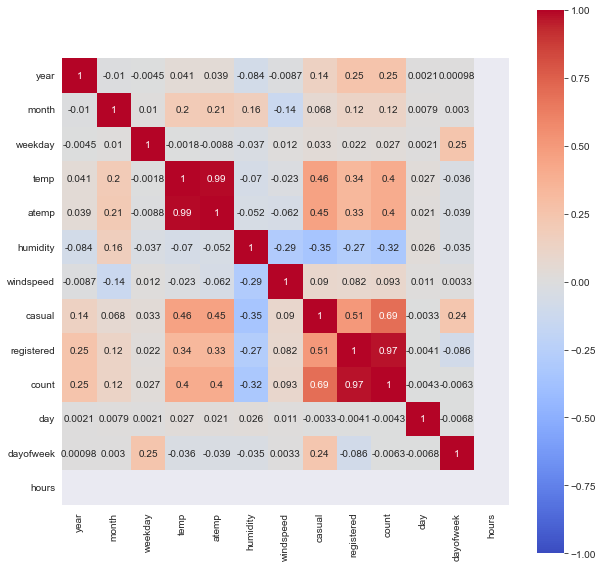

In [23]:
# corelation between each features

plt.figure(figsize=(10,10))
sns.heatmap(copy_result.corr('pearson'),vmin=-1,vmax=1,cmap='coolwarm',annot=True,square=True)

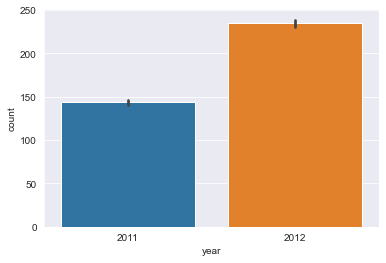

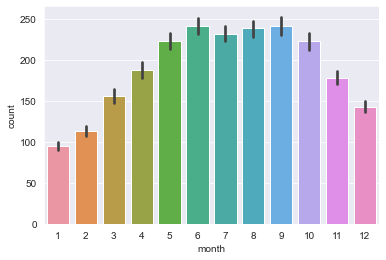

C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


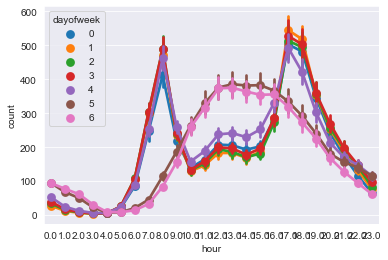

In [26]:
# barplot between year,month and count , and pointplot between hour and count

# fig,axes = plt.subplots(nrows=1,ncols=3)
# fig.set_size_inches(25,5)
# sns.barplot(data=copy_result,x='year',y='count',ax=axes[0])
# sns.barplot(data=copy_result,x='month',y='count',ax=axes[1])
# sns.pointplot(data=copy_result,x='hour',y='count',ax=axes[2],hue='dayofweek')
sns.barplot(data=copy_result,x='year',y='count')
plt.show()
sns.barplot(data=copy_result,x='month',y='count')
plt.show()
sns.pointplot(data=copy_result,x='hour',y='count',hue='dayofweek')
plt.show()

# What is the relation between (humidity,temp) and users?

[Text(0.5, 1.0, 'Relation between humidity and users')]

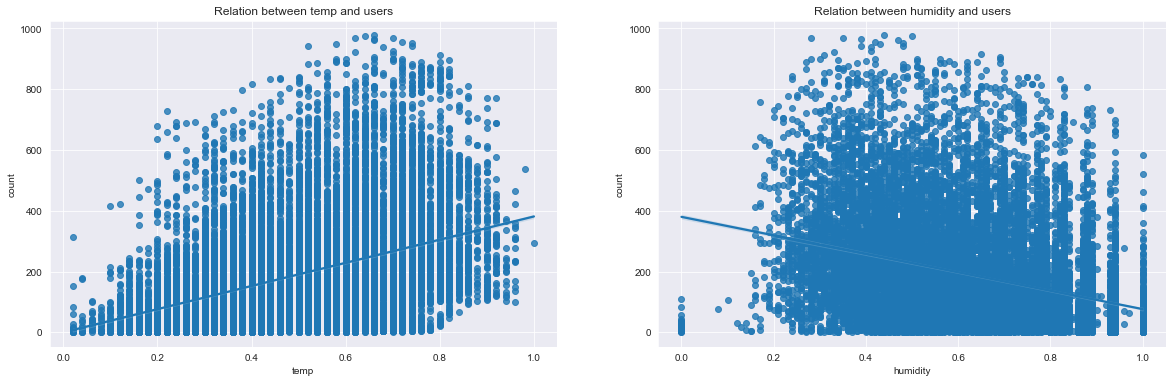

In [28]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=copy_result['temp'],y=copy_result['count'],ax=ax1)
ax1.set(title='Relation between temp and users')
sns.regplot(x=copy_result['humidity'],y=copy_result['count'],ax=ax2)
ax2.set(title='Relation between humidity and users')

When humidity increases, users decreases when temp increases, users increases

# how many bikes shared during weekdays and weekends?

C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

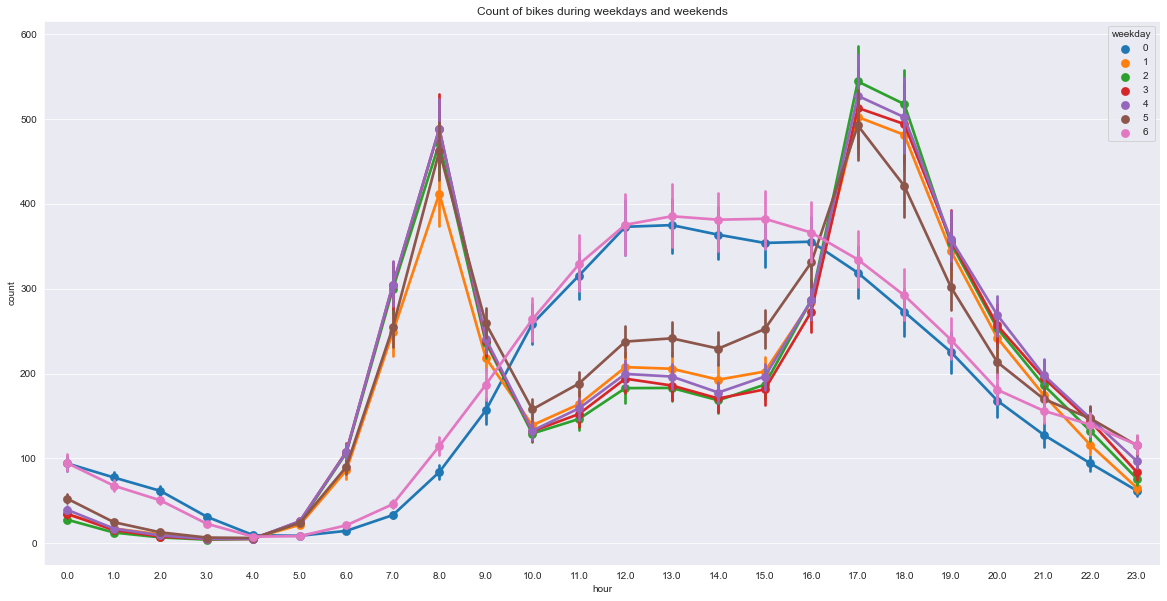

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='count',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

# how many shared bikes during weekdays and weekends: Unregistered users?

C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: unregistered users')]

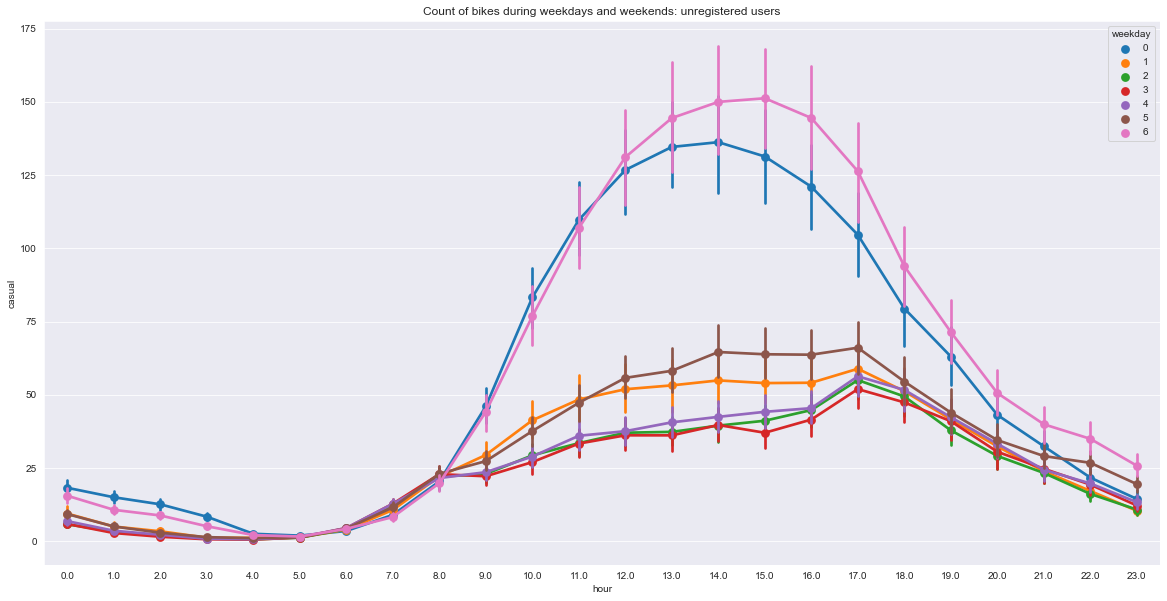

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='casual',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: unregistered users')

# What is the Count of bikes during weekd/ays and weekends: Registered users?

C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: registered users')]

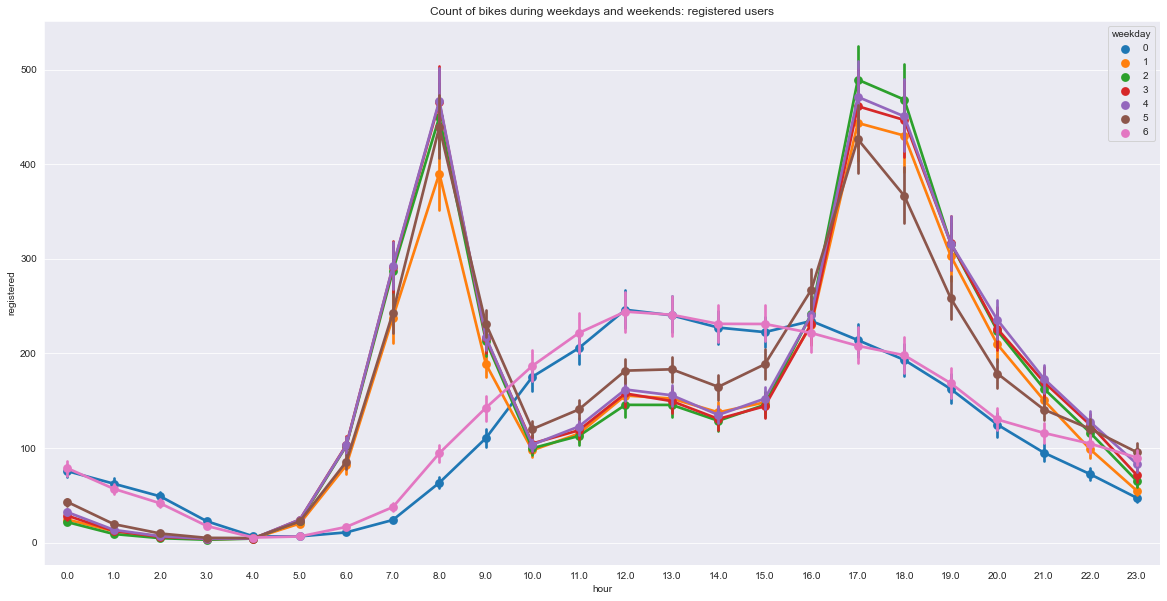

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='registered',hue='weekday',ax=ax)
ax.set(title='Count of bikes during weekdays and weekends: registered users')

# what is the Count of bikes during different weathers??

C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Count of bikes during weather')]

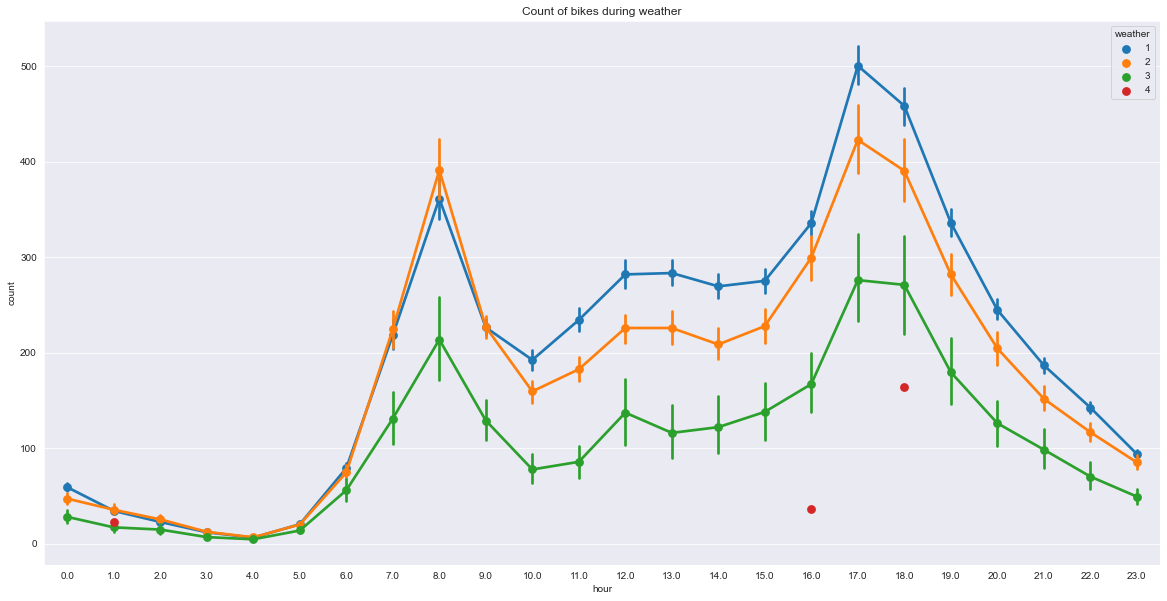

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='count',hue='weather',ax=ax)
ax.set(title='Count of bikes during weather')

=> so here we have 4 different typs of weather at 4:00 pm and 6:00 pm => we have less numbers of users that are most likely in heavy rain weather

-> green graph is most likely for cloudy or shower rain

# what is the Count of bikes during different seasons?

C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Users\maria\anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Count of bikes during seasons')]

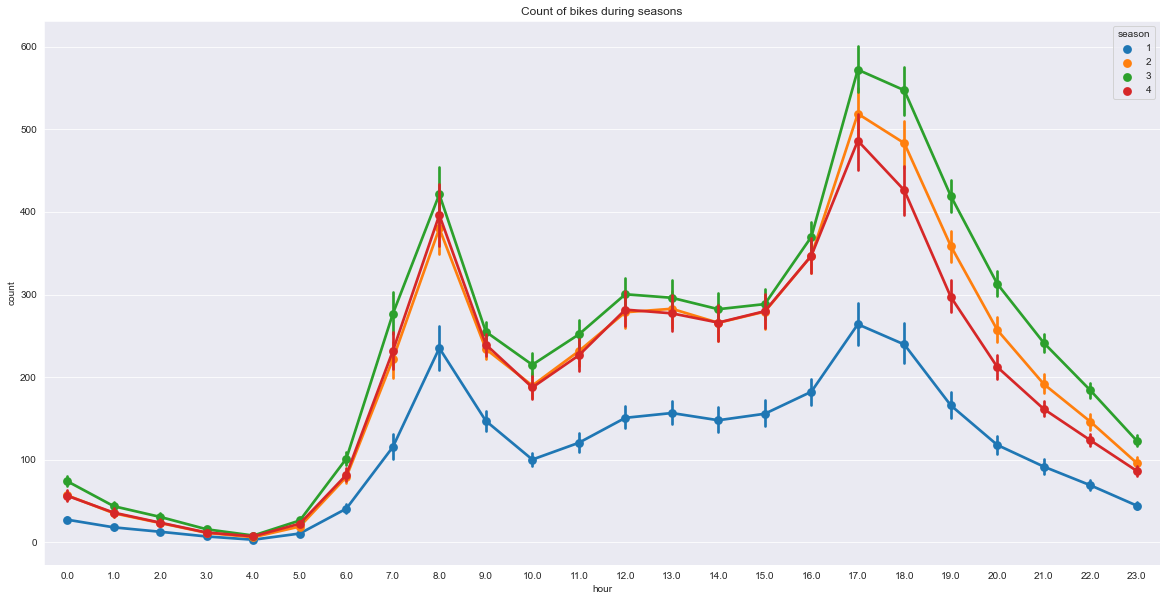

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=copy_result,x='hour',y='count',hue='season',ax=ax)
ax.set(title='Count of bikes during seasons')

we have here 4 numbers of seasons only one of them is lower at bike counts
'blue graph' => might be winter

# how many bikes shared during different months?

[Text(0.5, 1.0, 'Count of bikes during months')]

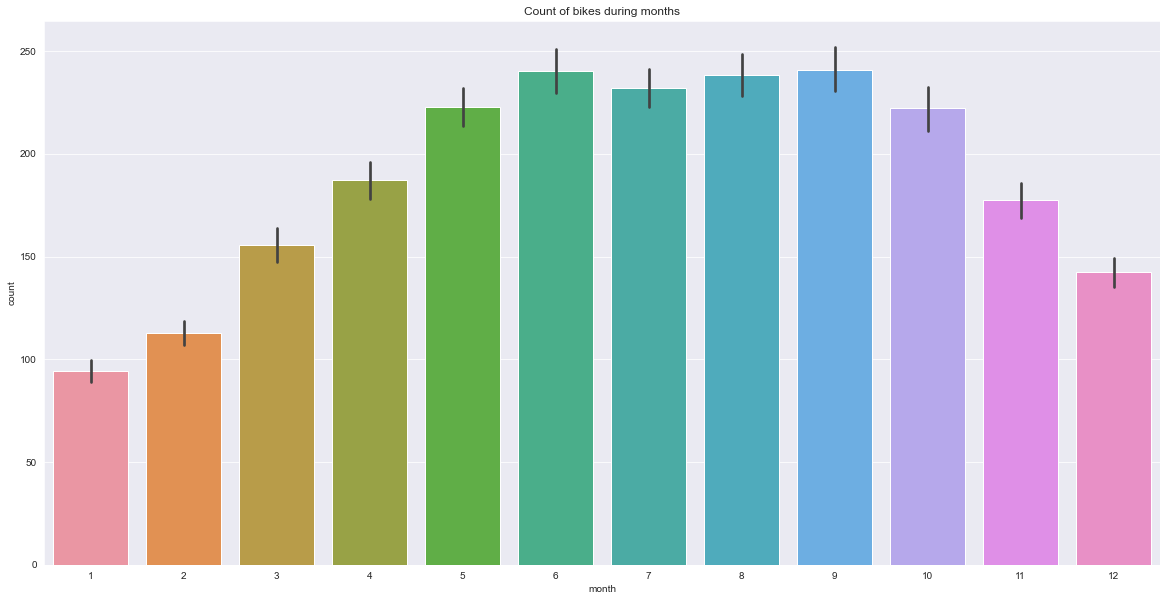

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=copy_result,x='month',y='count',ax=ax)
ax.set(title='Count of bikes during months')

# how many bikes shared during the days?

[Text(0.5, 1.0, 'Count of bikes during days')]

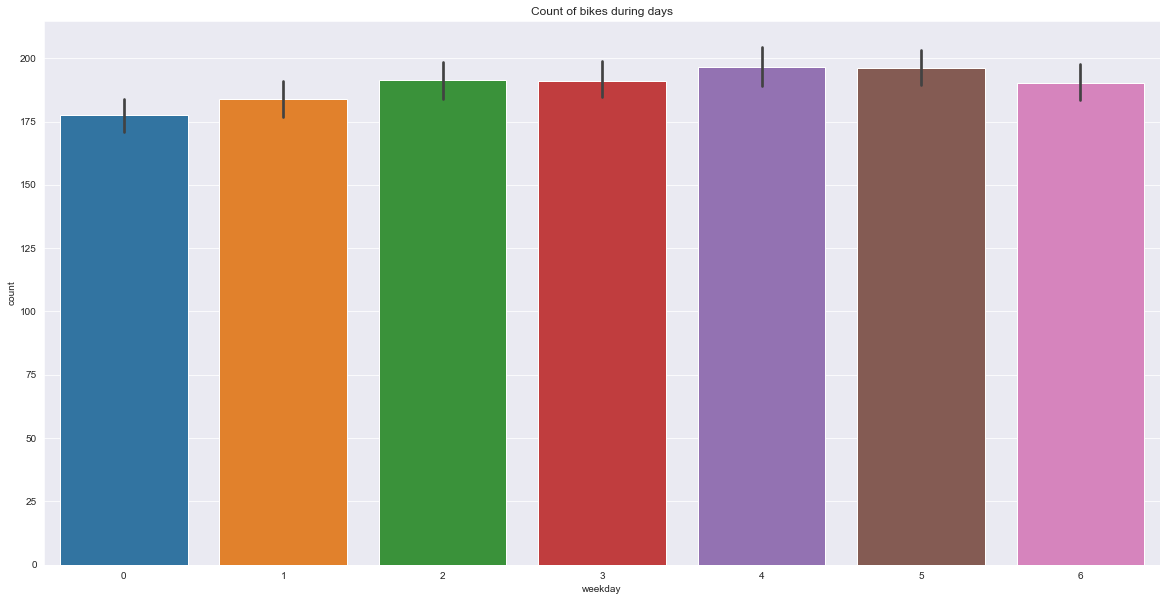

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=copy_result,x='weekday',y='count',ax=ax)
ax.set(title='Count of bikes during days')

# one hot encoding

In [45]:
pd.get_dummies(copy_result['season'],prefix='season')

,season_1,season_2,season_3,season_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
17374,1,0,0,0
17375,1,0,0,0
17376,1,0,0,0
17377,1,0,0,0


In [47]:
df_OHE = copy_result

def one_hot_encoding(data,column):
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column)],axis=1)
    data=data.drop([column],axis=1)
    return data

cols = ['season','month','hour','holiday','workingday','weather']


for col in cols:
    df_OHE = one_hot_encoding(df_OHE,col)
# to see the changes
df_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 60 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          17379 non-null  int64  
 1   weekday       17379 non-null  int64  
 2   temp          17379 non-null  float64
 3   atemp         17379 non-null  float64
 4   humidity      17379 non-null  float64
 5   windspeed     17379 non-null  float64
 6   casual        17379 non-null  int64  
 7   registered    17379 non-null  int64  
 8   count         17379 non-null  int64  
 9   day           17379 non-null  int64  
 10  dayofweek     17379 non-null  int64  
 11  hours         17379 non-null  int64  
 12  season_1      17379 non-null  uint8  
 13  season_2      17379 non-null  uint8  
 14  season_3      17379 non-null  uint8  
 15  season_4      17379 non-null  uint8  
 16  month_1       17379 non-null  uint8  
 17  month_2       17379 non-null  uint8  
 18  month_3       17379 non-nu

In [48]:
df_OHE.head()

,year,weekday,temp,atemp,humidity,windspeed,casual,registered,count,day,...,hour_22.0,hour_23.0,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,2011,6,0.24,0.2879,0.81,0.0,3,13,16,1,...,0,0,1,0,1,0,1,0,0,0
1,2011,6,0.22,0.2727,0.80,0.0,8,32,40,1,...,0,0,1,0,1,0,1,0,0,0
2,2011,6,0.22,0.2727,0.80,0.0,5,27,32,1,...,0,0,1,0,1,0,1,0,0,0
3,2011,6,0.24,0.2879,0.75,0.0,3,10,13,1,...,0,0,1,0,1,0,1,0,0,0
4,2011,6,0.24,0.2879,0.75,0.0,0,1,1,1,...,0,0,1,0,1,0,1,0,0,0


In [50]:
# write the result to a new CSV file
copy_result.to_csv('newrResultBikeSharing.csv')